In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

iris = load_iris()
x = iris.data[50:150,]

le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.33,random_state = 123)
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
#计算ROC
probas = clf.fit(train_x,train_y).predict_proba(test_x)
probas[:,1]

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.])

In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(test_y,probas[:,1])

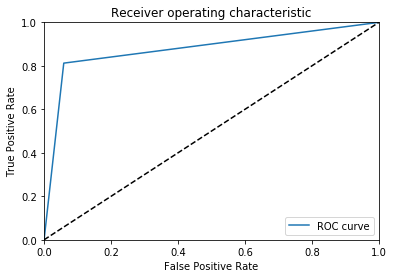

In [33]:
#建立ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = 'ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [35]:
#AUC,area under curve，AUC的面积越大，代表此分类器越精确。
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
print('AUC:{}'.format(roc_auc))

AUC:0.8768382352941176


In [36]:
#建立不同的模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_x,train_y)

clf2 = SVC(probability=True)
clf2.fit(train_x,train_y)

clf3 = LogisticRegression()
clf3.fit(train_x,train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


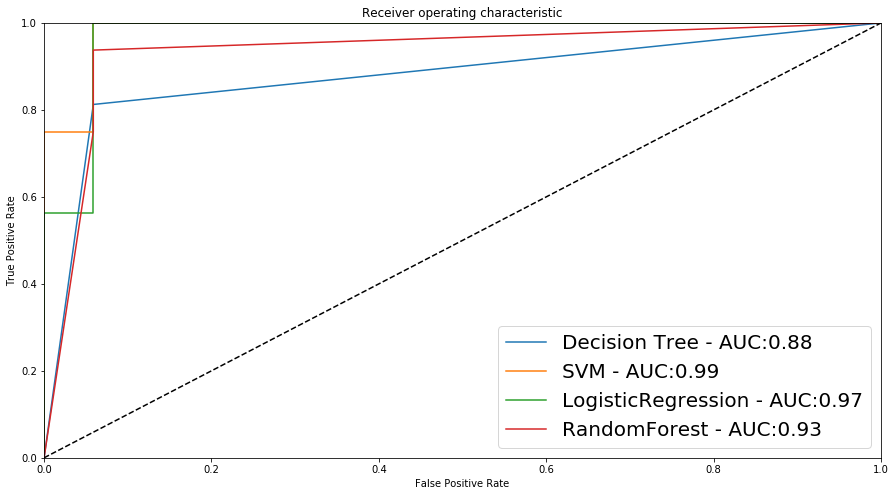

In [43]:
plt.figure(figsize=[15,8])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas = clf.fit(train_x,train_y).predict_proba(test_x)
    fpr,tpr,thresholds =roc_curve(test_y,probas[:,1])
    plt.plot(fpr,tpr,label = '%s - AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right',fontsize= 20)
plt.show()